# Анализ рынка продаж компьютерных игр

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).

**Цель проекта**

Выявить определяющие успешность игры закономерности, что позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Ход исследования**

Необходимые данные мы получим из предоставленного CSV-файла. Работа с этими данными включает в себя несколько этапов:
1. Предобработка данных 
- замена названий столбцов
- изменение типов данных
- обработка пропусков
- обработка дубликатов
2. Исследовательский анализ, в ходе которого выявим популярные игровые платформы и популярные игры, а также факторы, определяющие эту популярность
3. Составление портрета пользователя каждого региона
- определение топ-5 платформ
- определние топ-5 жанров игр
- изучение влияния рейтинга ESRB на продажи
4. Проверка гипотез

### Откройте файл с данными и изучите общую информацию

Импортируем библиотеки, с которыми будем работать в дальнейшем:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st
from scipy.stats import binom

Откроем CSV-файл с помощью библиотеки *pandas*:

In [2]:
# для работы над проектом в практикуме
try:
    games = pd.read_csv('/datasets/games.csv')
# для локальной работы над проектом
except: 
    games = pd.read_csv('games.csv')

Выведем первые 20 строк датафрейма на экран:

In [3]:
games.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Полученный датафрейм содержит следующую информацию:
- *Name* — название игры
- *Platform* — платформа
- *Year_of_Release* — год выпуска
- *Genre* — жанр игры
- *NA_sales —* продажи в Северной Америке (миллионы проданных копий)
- *EU_sales* — продажи в Европе (миллионы проданных копий)
- *JP_sales* — продажи в Японии (миллионы проданных копий)
- *Other_sales —* продажи в других странах (миллионы проданных копий)
- *Critic_Score* — оценка критиков (максимум 100)
- *User_Score* — оценка пользователей (максимум 10)
- *Rating* — рейтинг от организации *ESRB* (англ. *Entertainment Software Rating Board).* Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Посмотрим общую информацию о датафрейме:

In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В датафрейме 16715 строк и 11 столбцов.
Какие проблемы я вижу:
- можно привести названия столбцов к нижнему регистру
- встречаются столбцы с пропущенными значениями, в трех последних столбцах - большое количетсво пропусков
- *Year_of_Release* - привести к типу int()
- *User_Score* - привести к типу float()

### Подготовьте данные

**2.1.** Приведем названия столбцов к нижнему регистру:

In [5]:
games.columns = games.columns.str.lower()
# games.info()

**2.2.** Преобразуем типы данных:

- в данных год релиза представлен в формате *float*, приведем года к привычному для нас целочисленному формату *int*. В данных есть пропуски, обработаем для начала их. 

Посчитаем долю пропущенных значений. Для этого количество строк с пропусками в годе релиза разделим на общее количество строк:

In [6]:
games.query('year_of_release.isna()').shape[0]/games.shape[0]

0.01609332934489979

Всего 1.6 %. Можно удалить эти данные, сильной погрешности в дальнейшие расчеты это не внесет.

In [7]:
games = games.dropna(subset=['year_of_release']) 
games['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000., 1995., 1991., 1981., 1987., 1980.,
       1983.])

Теперь можно изменить тип данных:

In [8]:
games['year_of_release'] = games['year_of_release'].astype(int)
# games.info()

- данные с оценками пользователей имеют тип *object*, приведем их к типу *float*. Для этого сначала выведем уникальные значения для проверки:

In [9]:
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Видим такое значение, как *tbd (to be determined - подлежит уточнению)*. Так как логически его трудно заменить, заменим его просто на значение *nan* и поменяем тип данных:

In [10]:
games['user_score'].replace('tbd', np.nan, inplace=True)
games['user_score'] = games['user_score'].astype('float')
# games.info()

**2.3.** Разберем и обработаем оставшиеся пропуски:

- столбец *name*:

In [11]:
games.query('name.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


У неизвестных игр есть продажи, что пригодится нам для дальнейших расчетов, поэтому не будем их удалять.

- столбец *genre*:

In [12]:
games.query('genre.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Пропуски в тех же данных, что и в случае с названиями, поэтому оставляем их.

- столбцы с рейтингами:

так как рейтинг игр нельзя заполнить как-то логически, например, опираясь на жанр, заменим пропуски одинаковым занчение 'non-rated'.

In [13]:
games['rating'] = games['rating'].fillna('non-rated')

Прочитав значения рейтингов, которые присваивает играм организация ESRB, я увидела, что изначально вместо рейтинга *Е* было обозначение *K-A*. Заменим все *K-A* на *E*:

In [14]:
# games['rating'].unique()
games.loc[games['rating'] == 'K-A', 'rating'] = 'E'

**2.4.** Проверим наличие дубликатов:

- явные дубликаты

In [15]:
games.duplicated().value_counts()

False    16446
dtype: int64

Явные дубликаты отсутствуют.

- неявные дубликаты

In [16]:
games.duplicated(subset=['name', 'platform', 'year_of_release']).sum()

2

Есть неявные дубликаты. Выведем их на экран

In [17]:
games[games.duplicated(subset=['name', 'platform', 'year_of_release'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14244,NaN,GEN,1993,NaN,0.0,0.00,0.03,0.0,NaN,NaN,non-rated
16230,Madden NFL 13,PS3,2012,Sports,0.0,0.01,0.00,0.0,83.0,5.5,E


Первый дубликат мы рассматривали в пунтке 2.3. Проверим второй дубликат:

In [18]:
games.query('name == "Madden NFL 13"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
507,Madden NFL 13,X360,2012,Sports,2.53,0.15,0.0,0.17,81.0,5.8,E
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
3986,Madden NFL 13,Wii,2012,Sports,0.47,0.00,0.0,0.03,NaN,7.3,E
5887,Madden NFL 13,PSV,2012,Sports,0.28,0.00,0.0,0.02,63.0,7.3,E
7066,Madden NFL 13,WiiU,2012,Sports,0.21,0.00,0.0,0.02,75.0,6.7,E
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


Видим совпадение в 604 и 16230 строчке. Удалим последнюю строчку и объединим данные о продажах в Европе:

In [19]:
# суммирую продажи
eu_sales_madden = games.query('name == "Madden NFL 13" and platform == "PS3"')['eu_sales'].sum()
# удаляю последнюю строку
games = games.drop(index=16230)
# заменяю значение продаж на полученное выше
games.loc[604, 'eu_sales'] = eu_sales_madden
# games.query('name == "Madden NFL 13"')

**2.5.** Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец:

In [20]:
games['total_sales'] = games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,non-rated,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,non-rated,31.38


**Вывод:** провели предобработку данных, привели названия столбцов к нижнему регистру, преобразовали типы данных и обработали пропуски и дубликаты. Теперь данные "чистые" и с ними можно работать дальше.

### Проведите исследовательский анализ данных

**3.1.** Посмотрим, сколько игр выпускалось в разные годы.

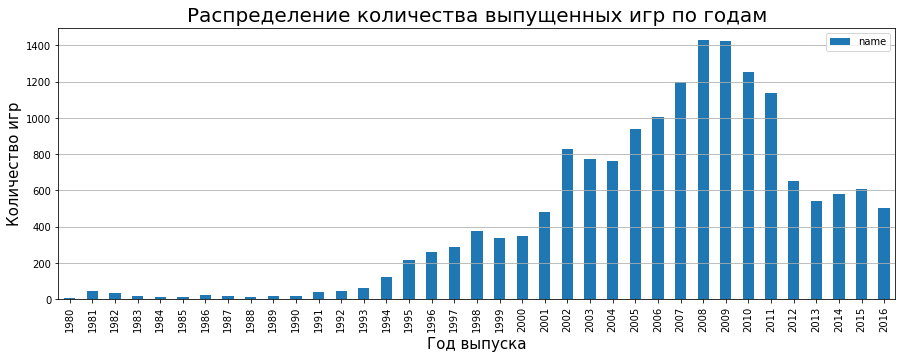

In [21]:
(games
 .pivot_table(index='year_of_release', values='name', aggfunc='count')
 .plot(kind='bar', figsize=(15,5), grid=True))
plt.title('Распределение количества выпущенных игр по годам', fontsize=20)
plt.xlabel('Год выпуска', fontsize=15)
plt.ylabel('Количество игр', fontsize=15)
plt.grid(axis='x')
plt.show()

**Вывод:**
- в 1994 году начинается заметный рост количества выпущенных игр
- с 2002 по 2011 выпущено наибольшее количество игр
- будем считать важными данные за период, начиная с 1994 года. В 1994 вышли такие приставки, как PlayStation 1, SEGA, с которыми, видимо, и связан скачок в развитии рынка игр.

**3.2.** Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам.

Построим сводную таблицу, в которой отобразим суммарные продажи для каждой платформы за каждый год.

In [22]:
games_on_platform = (
    games.pivot_table(index = 'platform',
                 columns = 'year_of_release', 
                 values = 'total_sales', 
                 aggfunc=sum,
                 margins=True)
    .fillna(0)
    .reset_index())
pd.set_option('display.max_columns', None)
games_on_platform

year_of_release,platform,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,All
0,2600,11.38,35.68,28.88,5.84,0.27,0.45,0.67,1.94,0.74,0.63,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,86.48
1,3DO,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.08,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.10
2,3DS,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,63.20,51.36,56.57,43.76,27.78,15.14,257.81
3,DC,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.38,5.16,5.99,1.07,0.29,0.00,0.00,0.00,0.00,0.02,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,15.95
4,DS,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,17.27,130.14,119.81,146.94,145.31,119.54,85.02,26.18,11.01,1.54,0.00,0.00,0.00,802.78
5,GB,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.43,64.97,4.89,5.57,25.49,0.00,12.18,3.60,36.03,6.37,26.90,38.00,19.76,9.24,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,254.43
6,GBA,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.07,61.53,74.16,56.67,77.91,33.86,5.28,3.40,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,312.88
7,GC,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,26.34,51.81,50.61,28.82,27.62,11.26,0.27,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,196.73
8,GEN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.60,4.33,12.64,3.07,8.13,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,30.77
9,GG,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.04


Вывдем на экран топ-10 платформ и общее количество игр для каждой платформы:

In [23]:
top_platforms = (
    games_on_platform[['platform', 'All']]
    .sort_values(by='All', ascending=False)
    .query('platform != "All"')
    .head(10)
)
top_platforms

year_of_release,platform,All
16,PS2,1233.56
28,X360,961.24
17,PS3,931.34
26,Wii,891.18
4,DS,802.78
15,PS,727.58
18,PS4,314.14
6,GBA,312.88
19,PSP,289.53
2,3DS,257.81


Построим график распределения продаж для топ-10 платформ по годам. Учтем игры, выпущенные с 1994 года.

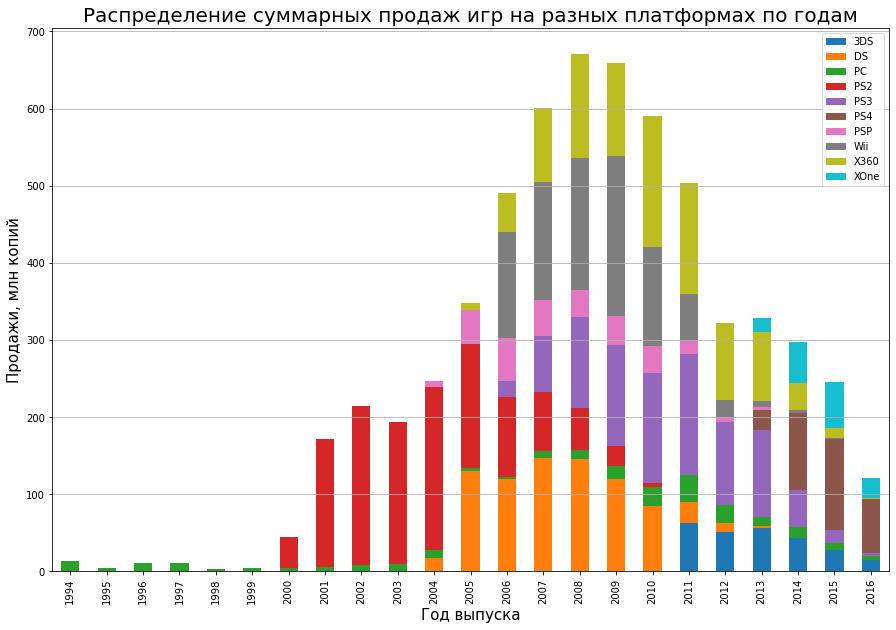

In [24]:
(games
 .query('year_of_release > 1993 and platform in ["X360", "PS3", "Wii", "DS", "PS2", "PS4", "PSP", "3DS", "PC", "XOne"]')
 .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc=sum)
 .fillna(0)
 .plot(kind='bar', stacked=True, figsize=(15,10), grid=True))
plt.title('Распределение суммарных продаж игр на разных платформах по годам', fontsize=20)
plt.xlabel('Год выпуска', fontsize=15)
plt.ylabel('Продажи, млн копий', fontsize=15)
plt.grid(axis='x')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера:</b> Молодец ,что подписываешь графики и оси! </div>

Определеим за какой характерный срок появляются новые и исчезают старые платформы

In [25]:
# создаю функцию для подсчета жизни платформ
def years_of_sales(platforma):
    """
    Фунцкия для определения длительности "жизни" платформ на рынке
    """
#   нахожу последний год, за который есть данные об играх на определенной платформе
    last_year = games[(games['platform'] == platforma) & (games['year_of_release'] > 1993)]['year_of_release'].max()
#   нахожу первый год, за который есть данные об играх на определенной платформе
    first_year = games[(games['platform'] == platforma) & (games['year_of_release'] > 1993)]['year_of_release'].min()
#   нахожу разницу между годами
    years = last_year - first_year + 1
    return years

In [26]:
# создаю список платформ
list_of_platforms = ["X360", "PS3", "Wii", "DS", "PS2", "PS4", "PSP", "3DS", "PC", "XOne"]
# создаю пустой список, куда будут добавляться года платформ
list_of_years = []
# с помощью цикла запускаю созданную функцию для каждой платформы и добавляю полученный результат в пустой список
for platforma in list_of_platforms:
    list_of_years.append(years_of_sales(platforma))
# создаю датафрейм, в котором каждой платформе соответсвует срок ее существования на рынке    
years_and_platforms = pd.DataFrame(data=[list_of_platforms, list_of_years])
years_and_platforms

,0,1,2,3,4,5,6,7,8,9
0,X360,PS3,Wii,DS,PS2,PS4,PSP,3DS,PC,XOne
1,12,11,11,10,12,4,12,6,23,4


**Вывод:** 
- больше всего продано игр для PS2 (1255.77 млн копий), следом идут продажи игры для X360 (971.42 млн копий), также  в топ-5 видим Nintendo DS. Неудивительно, такие приставки, как Sony Playstation, Xbox и Nintendo всегда были на слуху и, пожалуй, первыми приходят на ум, когда разговор идет о видеоиграх
- для платформ от производителя Sony и Nintendo характерен 11-летний период выпуска игр. Для каждой платформы от Windows свой период выпуска игр: приставка Xbox360 на момент публикации данных выпускала игры уже 12 лет, для PC игры выпускаются уже больше 23 лет.

**3.3.** Определим актуальный период, который поможет нам построить прогноз на 2017 год. С этим периодом мы будем работать дальше.


Построим таблицу и график распределения продаж, который позволит нам оценить продажи:

In [27]:
(games.query('year_of_release > 1993 and platform in ["X360", "PS3", "Wii", "DS", "PS2", "PS4", "PSP", "3DS", "PC", "XOne"]')
 .pivot_table(index = 'platform',
                      columns = 'year_of_release', 
                      values = 'total_sales', 
                      aggfunc=sum)
)

year_of_release,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,,,,,,,,,,,,,,
3DS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.20,51.36,56.57,43.76,27.78,15.14
DS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.27,130.14,119.81,146.94,145.31,119.54,85.02,26.18,11.01,1.54,NaN,NaN,NaN
PC,12.87,4.22,10.58,11.27,3.26,4.74,4.66,5.47,8.57,8.84,10.39,4.37,2.85,9.28,12.42,16.91,24.28,35.03,23.22,12.38,13.28,8.52,5.25
PS2,NaN,NaN,NaN,NaN,NaN,NaN,39.17,166.43,205.38,184.31,211.81,160.66,103.42,75.99,53.90,26.40,5.64,0.45,NaN,NaN,NaN,NaN,NaN
PS3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.96,73.19,118.52,130.93,142.17,156.78,107.36,113.25,47.76,16.82,3.60
PS4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.99,100.00,118.90,69.25
PSP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.06,43.84,55.32,46.93,34.55,37.78,35.04,17.82,7.69,3.14,0.24,0.12,NaN
Wii,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,137.15,152.77,171.32,206.97,127.95,59.65,21.71,8.59,3.75,1.14,0.18
X360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.25,51.62,95.41,135.26,120.29,170.03,143.84,99.74,88.58,34.74,11.96,1.52


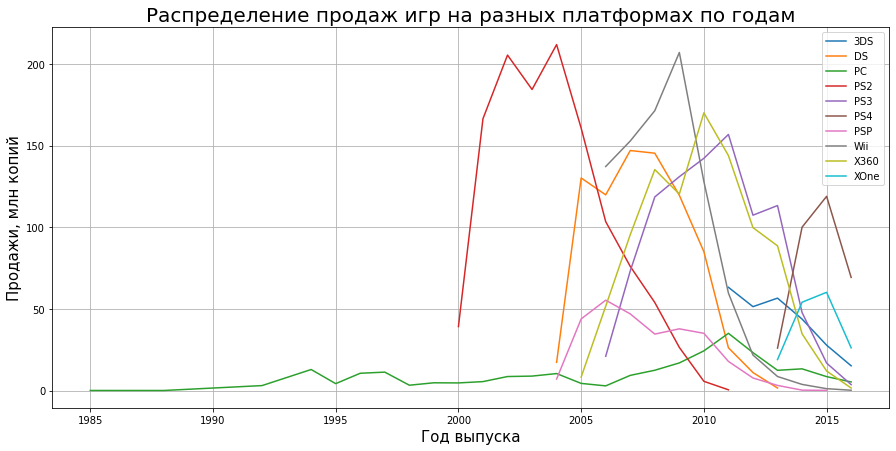

In [28]:
(games.query('platform in ["X360", "PS3", "Wii", "DS", "PS2", "PS4", "PSP", "3DS", "PC", "XOne"]')
 .pivot_table(index = 'year_of_release',
                      columns = 'platform', 
                      values = 'total_sales', 
                      aggfunc=sum)
 .plot(figsize=(15,7), grid=True) 
)
plt.title('Распределение продаж игр на разных платформах по годам', fontsize=20)
plt.xlabel('Год выпуска', fontsize=15)
plt.ylabel('Продажи, млн копий', fontsize=15)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

**Вывод:** 

для 2016 года видим падение продаж, возможно,это связано с тем, что нам предоставили данные не за весь 2016 год. 

Я возьму период с 2014 по 2016 год, так как в этот период набирают популярность такие платформы, как PS4 и XOne, и их продажи увеличиваются. Исходя из тенденции (видно, что в первые 5 лет продажи в основном росли для каждой из платформ), эти приставки в 2017 могут достичь своего пика продаж. Также не потеряла еще своей актуальности приставка 3DS, ее продажи в 2016 году составляют 15.14 млн копий. Остальные платформы уже изжили себя, и нас не интересуют их продажи в 2017 году.

In [29]:
# создаю новый датафрейм с актуальным периодом
games_actual = games.query('year_of_release > 2013')

**3.4.** Определим несколько потенциально прибыльных платформ.

Выведем на экран суммарные продажи для каждой платформы:

In [30]:
actual_sales = (
    games_actual.pivot_table(index = 'year_of_release',
                      columns = 'platform', 
                      values = 'total_sales', 
                      aggfunc=sum)
)
actual_sales

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,
2014,43.76,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


Построим график распредления продаж игр:

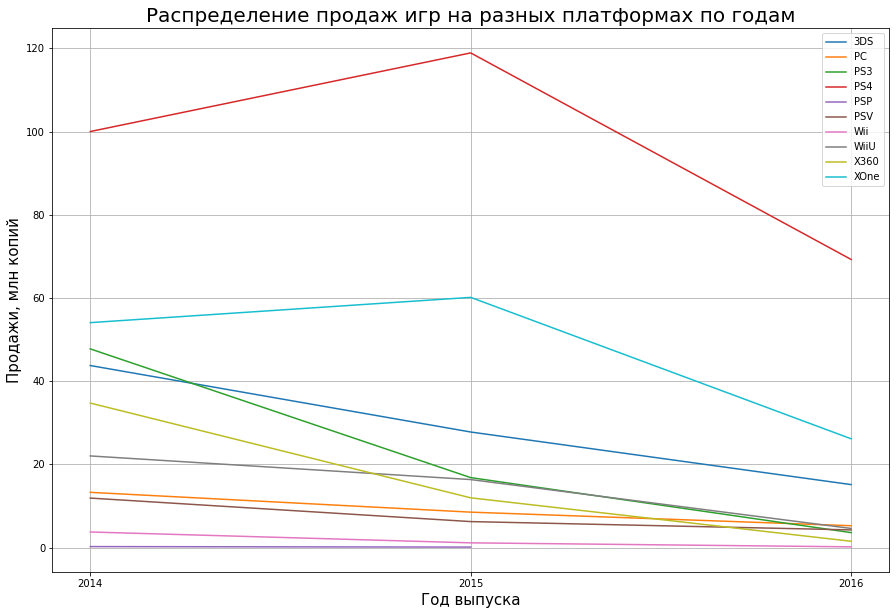

In [31]:
actual_sales.plot(figsize=(15,10), grid=True)
plt.title('Распределение продаж игр на разных платформах по годам', fontsize=20)
plt.xlabel('Год выпуска', fontsize=15)
plt.ylabel('Продажи, млн копий', fontsize=15)
plt.xticks(np.arange(2014, 2016.1, 1))
plt.legend(bbox_to_anchor=(1,1))
plt.show()

**Вывод:** 
исходя из вывода в предыдщуем пункте и этого графика в дальнейшем будем рассматривать такие платформы, как **PS4**, **XOne**, **3DS**. При этом я бы оставила в актульных платформах и PC ак как компьютерные игры непрерывно выпускают ждый год, начиная с 1994 года.

Продажи игр для остальных платформ на 2016 год уже прекращены или стремятся к нулю, так как их заменили их более продвинутые аналоги.
Итак, потенциально прибыльные платформы:
- PS4
- XOne
- 3DS
- PC

**3.5.** Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

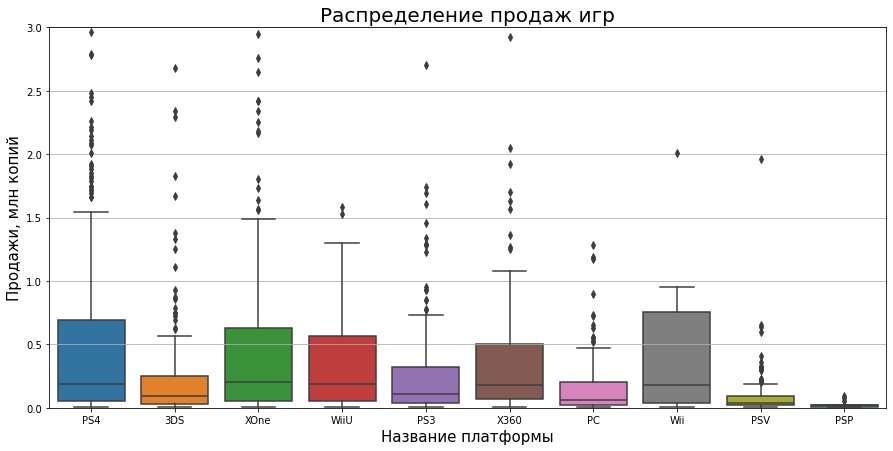

In [32]:
# для создания нескольких ящиков на одном графике использую библиотеку seaborn
# так как нашла только такой способ
plt.figure(figsize=(15,7))
ax = sns.boxplot(x='platform', y='total_sales', data=games_actual)
plt.title('Распределение продаж игр', fontsize=20)
plt.xlabel('Название платформы', fontsize=15)
plt.ylabel('Продажи, млн копий', fontsize=15)
plt.grid(axis='y')
plt.ylim(0, 3)
plt.show()

In [33]:
def describe_of_sales(parameter):
    """Функция для вывода характеристик продаж, которая в качесвте параметра принимает название платформы
    
    """
    return games_actual.query('platform == @parameter')['total_sales'].describe()

In [34]:
describe_of_sales("PSV")

count    295.000000
mean       0.075932
std        0.141591
min        0.010000
25%        0.020000
50%        0.040000
75%        0.090000
max        1.960000
Name: total_sales, dtype: float64

In [35]:
# игры с продажами больше 8 млн копий
games_actual.query('total_sales > 8')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,non-rated,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,non-rated,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58


**Вывод:** 
- медиана продаж для всех платформ смещена к первому квартилю, то есть большинство игр для каждой платформы характеризуется невысокими продажами (не выше 200 тысяч копий). Самая низкая медиана у PSP и PSV (меньше 50 тысяч копий).
- у каждой платформы на графике есть выбросы, это игры-бестселлеры. Для PS4 и 3DS несколько игр и одна для PC превышают продажи в 8 млн копий! Выше вывела на экран эти игры

**3.6.** Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами

Продажи будем рассматривать на примере платформы PS4.

In [36]:
# создаю отдельный дф с данными для платформы PS4
games_ps4 = games_actual.query('platform == "PS4"')

/opt/conda/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1041: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


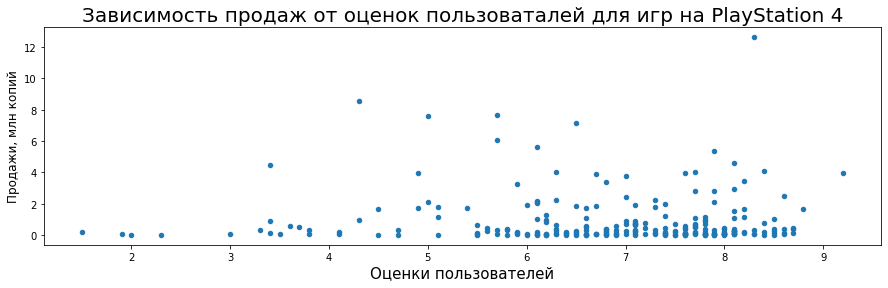

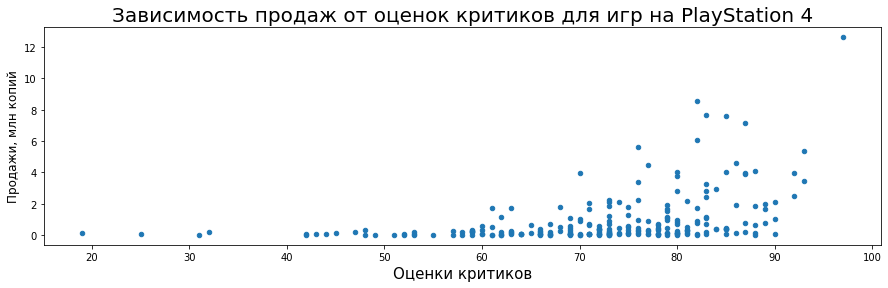

Коэффициент корреляции продажи-отзывы пользователей: -0.040131589472697356
Коэффициент корреляции продажи-отзывы критиков: 0.40266141068104083


In [37]:
# диаграмма рассеяния для отзывов пользователей
games_ps4.plot(kind='scatter', x='user_score', y='total_sales', figsize=(15,4))
plt.title('Зависимость продаж от оценок пользоваталей для игр на PlayStation 4', fontsize=20)
plt.xlabel('Оценки пользователей', fontsize=15)
plt.ylabel('Продажи, млн копий', fontsize=12)
# диаграмма рассеяния для отзывов критиков
games_ps4.plot(kind='scatter', x='critic_score', y='total_sales', figsize=(15,4))  
plt.title('Зависимость продаж от оценок критиков для игр на PlayStation 4', fontsize=20)
plt.xlabel('Оценки критиков', fontsize=15)
plt.ylabel('Продажи, млн копий', fontsize=12)
plt.show()
# расчет коэффициентов корреляции
print(f"Коэффициент корреляции продажи-отзывы пользователей: {games_ps4['total_sales'].corr(games_ps4['user_score'])}")
print(f"Коэффициент корреляции продажи-отзывы критиков: {games_ps4['total_sales'].corr(games_ps4['critic_score'])}")

**Вывод:** для выбранной платформы зависимость продаж от отзывов критиков сильнее, чем от отзывов пользователей, но в обоих случаях эта зависимость слабая и разброс большой. Видимо, геймеры больше полагаются на свой выбор, нежели на отзывы от других людей.

**3.7.** Рассмотрим зависимость и для остальных платформ

Создам функцию для построения диаграммы и подсчета коэффициента корреляции:

In [38]:
def correlation(row):
    """
    Функция, которая принимает в качестве параметра название платформы и для этой платформы
    строит диаграмму рассеяния и считает корреляцию
    """
    # создаю отдельный дф с данными для конкретной платформы
    games_platform = games_actual.query('platform == @row')
    #диаграмма рассеяния для отзывов пользователей 
    games_platform.plot(kind='scatter', x='user_score', y='total_sales', figsize=(15,4))
    plt.title(f'Зависимость продаж от оценок пользоваталей для игр на {row}', fontsize=20)
    plt.xlabel('Оценки пользователей', fontsize=15)
    plt.ylabel('Продажи, млн копий', fontsize=12)
    # диаграмма рассеяния для отзывов критиков
    games_platform.plot(kind='scatter', x='critic_score', y='total_sales', figsize=(15,4))  
    plt.title(f'Зависимость продаж от оценок критиков для игр на {row}', fontsize=20)
    plt.xlabel('Оценки критиков', fontsize=15)
    plt.ylabel('Продажи, млн копий', fontsize=12)
    plt.show()
    # вывод корреляции
    corr_user = f"Коэффициент корреляции продажи-отзывы пользователей для {row}: {games_platform['total_sales'].corr(games_platform['user_score'])}"
    corr_critic = f"Коэффициент корреляции продажи-отзывы критиков для {row}: {games_platform['total_sales'].corr(games_platform['critic_score'])}"
    return corr_user, corr_critic

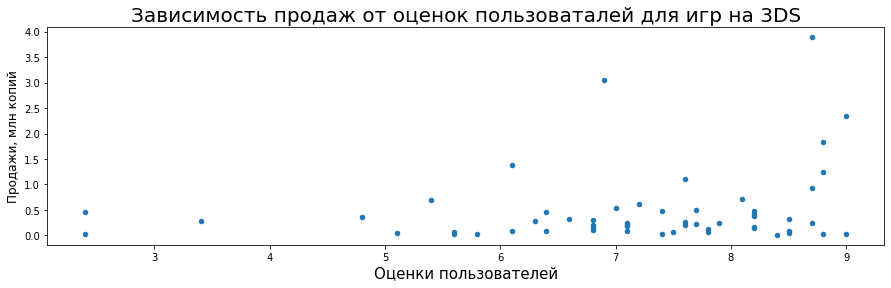

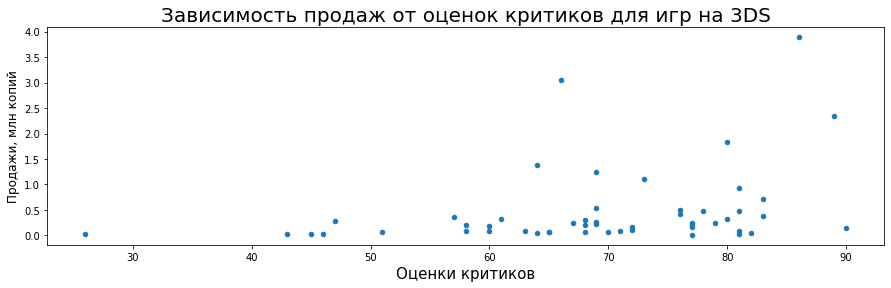

'Коэффициент корреляции продажи-отзывы пользователей для 3DS: 0.2151932718527028'

'Коэффициент корреляции продажи-отзывы критиков для 3DS: 0.31411749286905105'

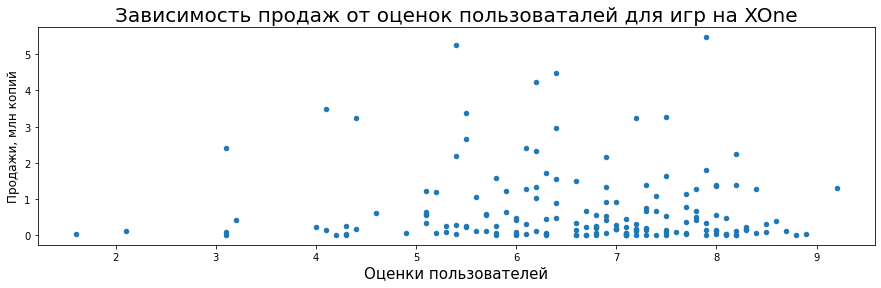

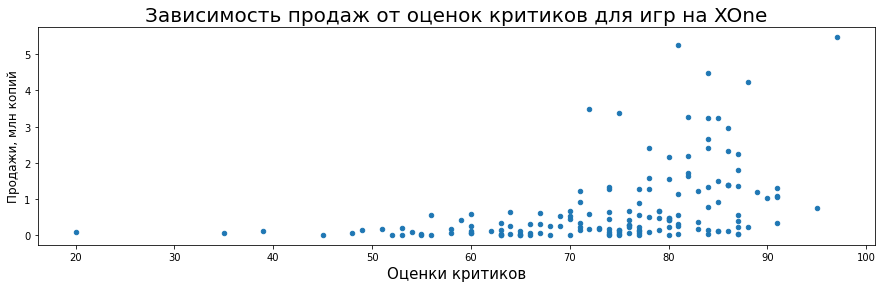

'Коэффициент корреляции продажи-отзывы пользователей для XOne: -0.0703839280647581'

'Коэффициент корреляции продажи-отзывы критиков для XOne: 0.42867694370333226'

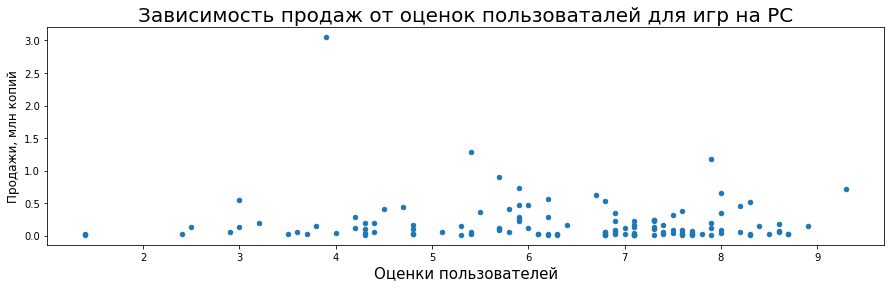

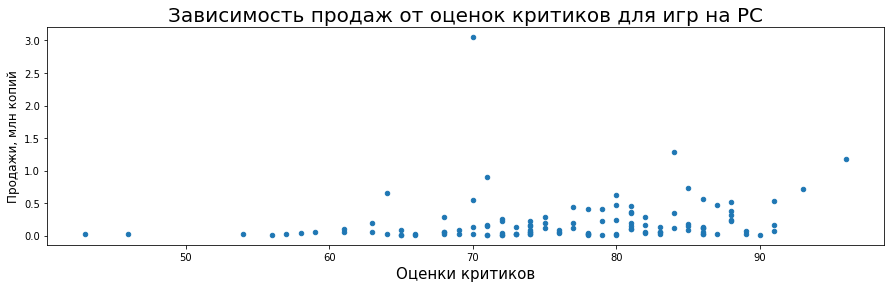

'Коэффициент корреляции продажи-отзывы пользователей для PC: -0.07159665703472452'

'Коэффициент корреляции продажи-отзывы критиков для PC: 0.17463413769350036'

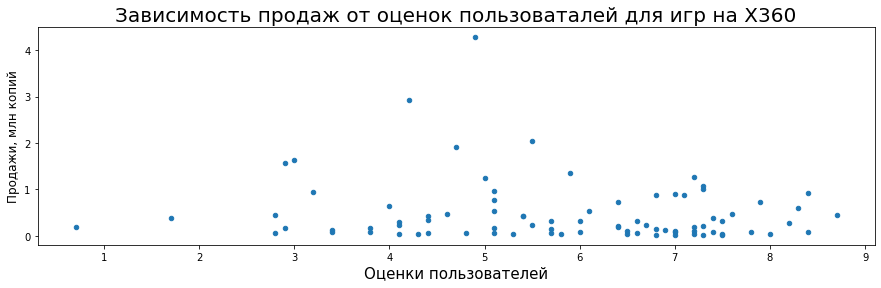

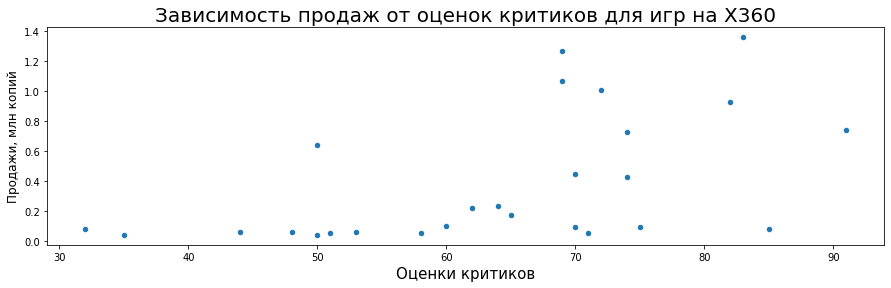

'Коэффициент корреляции продажи-отзывы пользователей для X360: -0.138444570945665'

'Коэффициент корреляции продажи-отзывы критиков для X360: 0.5257228356581523'

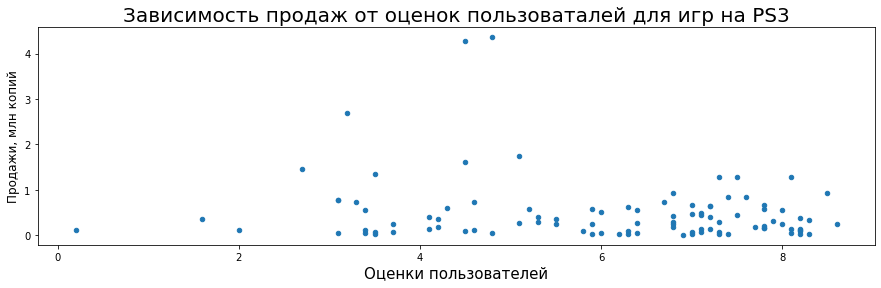

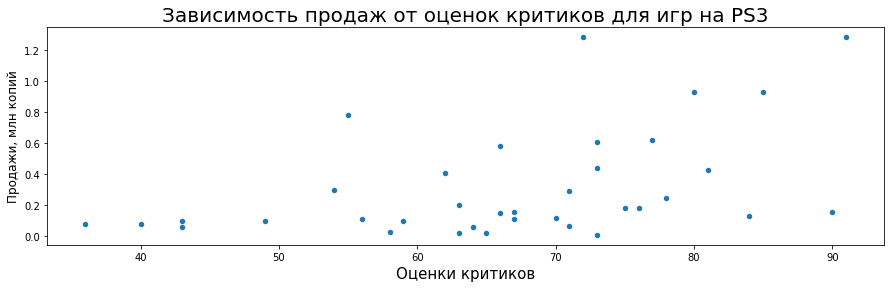

'Коэффициент корреляции продажи-отзывы пользователей для PS3: -0.16676141347662116'

'Коэффициент корреляции продажи-отзывы критиков для PS3: 0.44657460493190704'

In [39]:
# создала цикл для вывода диаграмм и корреляции
# такой список, потому что только для этих платформ в выбранном периоде есть достаточное количество отзывов
list_of_platforms = [ "3DS", "XOne", "PC", "X360", "PS3"]  
for i in list_of_platforms:
    corr_user, corr_critic = correlation(i)
    display(corr_user)
    display(corr_critic)

**Вывод:** для всех платформ наблюдается слабая зависимость отзывов от продаж. Также отзывы критиков влияют сильнее на продажи, чем отзывы от пользоваталей. Самая сильное влияние оказывают отзывы критиков на игры для X360 (коэффициент 0.525). Остальные абсолютные значения коэффициентов корреляции меньше 0.5.

**3.8.** Теперь посмотрим на общее распределение игр по жанрам. 

Создадим сводную таблицу с продажами и количеством игр для каждого жанра

In [40]:
genre_sales = (games_actual.pivot_table(index='genre', 
                      values=['name', 'total_sales'], 
                      aggfunc={'name': 'count', 'total_sales': sum})
 .sort_values(by='total_sales', ascending=False)            
)
genre_sales.columns = ['quantity', 'total_sales']
genre_sales

,quantity,total_sales
genre,,
Action,619,199.36
Shooter,128,170.94
Sports,161,109.48
Role-Playing,221,101.44
Misc,113,37.55
Fighting,60,28.22
Racing,69,27.52
Platform,38,18.09
Adventure,185,17.55


Выведем столбчатые диаграммы:

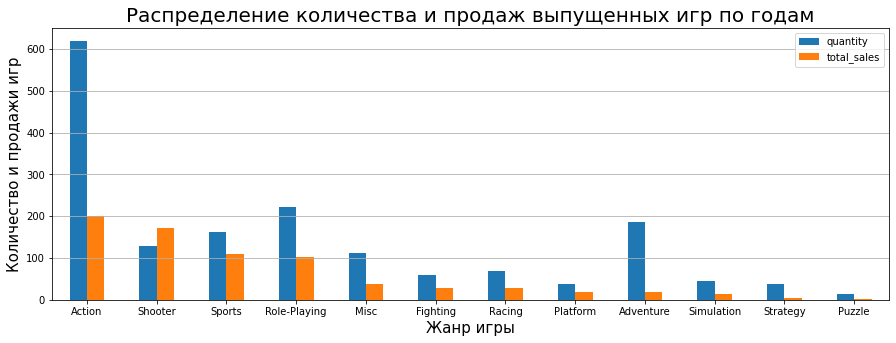

In [41]:
genre_sales.plot(kind='bar', y = ['quantity', 'total_sales'], figsize=(15,5), grid=True)
plt.title('Распределение количества и продаж выпущенных игр по годам', fontsize=20)
plt.xlabel('Жанр игры', fontsize=15)
plt.ylabel('Количество и продажи игр', fontsize=15)
plt.grid(axis='x')
plt.xticks(rotation=0)
plt.show()

Больше всего выпущено игр в жанре Action, Role-Playing и Adventure. При этом экшены также являются и самыми продаваемыми играми. Дальше по продажам следуют шутеры и игры, связанные со спортом. А вот многочисленные приключения не отличаются высокими продажами, они вторые с конца по проданным копиям. Самые непродаваемые игры - в жанре Puzzle. 

Посчитаем медиану проданных игр, найдем, сколько приходится проданных копий на одну выпущенную игру и построим график распределния этого соотношения:

In [42]:
genre_sales_median = (games_actual.pivot_table(index='genre', 
                      values=['name', 'total_sales'], 
                      aggfunc={'name': 'count', 'total_sales':'median'})        
)
genre_sales_median.columns = ['quantity', 'total_sales_median']
genre_sales_median['ratio'] = genre_sales_median['quantity']/(genre_sales_median['total_sales_median']*10**6)
genre_sales_median.sort_values(by='ratio', ascending=False)

,quantity,total_sales_median,ratio
genre,,,
Action,619,0.090,0.006878
Adventure,185,0.030,0.006167
Role-Playing,221,0.110,0.002009
Misc,113,0.090,0.001256
Sports,161,0.180,0.000894
Racing,69,0.090,0.000767
Strategy,37,0.060,0.000617
Fighting,60,0.125,0.000480
Simulation,44,0.100,0.000440


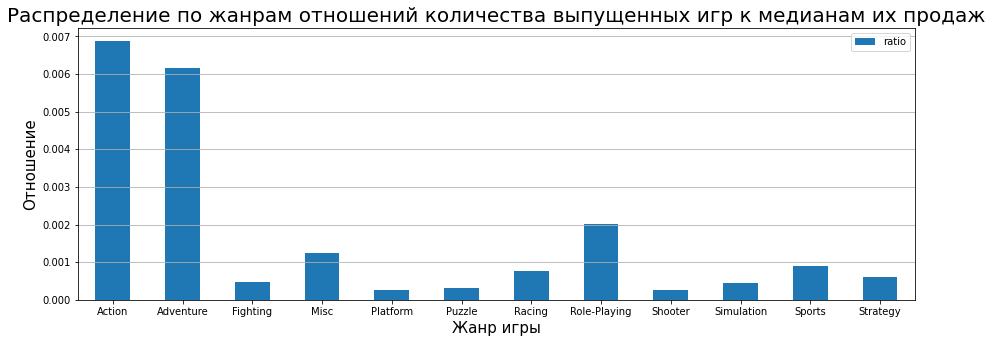

In [43]:
genre_sales_median.plot(kind='bar', y = 'ratio', figsize=(15,5), grid=True, legend=True)
plt.title('Распределение по жанрам отношений количества выпущенных игр к медианам их продаж', fontsize=20)
plt.xlabel('Жанр игры', fontsize=15)
plt.ylabel('Отношение', fontsize=15)
plt.grid(axis='x')
plt.xticks(rotation=0)
plt.show()

**Вывод:**
исключение влияние выбросов и расчет количества проданных копий на одну выпущенную игру помогли нам выяснить, что экшн также является топ-1 жанром. Но теперь на 2 месте с небольшим отставанием расположились приключения. А ролевые игры с сильным отставанием занимают 3 место. А вот шутеры сместились на последнее место. 
Таким образом, самые популярные жанры: экшн, приключения и ролевые игры. Связаны такие наблюдения могут быть с несколькими причинами:
- активные и яркие игры сильнее привлекают пользователей, чем игры, в который надо подумать и посидеть (головоломки, стратегии)
- экшены, приключения и ролевые игры в разы дороже в производстве, и для их продажи осуществляется хороший маркетинг, который поможет увеличить выручку. Поэтому покупатели выбирают такие "громкие" игры.

### Составьте портрет пользователя каждого региона

**4.1** Определим для пользователя каждого региона топ-5 популярных платформ

Создадим сводную таблицу с долями продаж в каждом регионе

In [44]:
(games_actual.pivot_table(index='platform', 
                   values=['na_sales', 'eu_sales', 'jp_sales'], 
                   aggfunc=sum)
.apply(lambda col: col / col.sum(),axis=0)
.style.format("{:.0%}"))

,eu_sales,jp_sales,na_sales
platform,,,
3DS,6%,48%,8%
PC,7%,0%,3%
PS3,9%,12%,8%
PS4,48%,16%,35%
PSP,0%,0%,0%
PSV,1%,16%,1%
Wii,1%,0%,1%
WiiU,5%,8%,7%
X360,6%,0%,10%


Столбчатые диаграммы распределения доли продаж игр для разных платформ построим с помощью функции:

In [45]:
def top_platforms(region, ax):
    """
    Функция для создания стобчатых диаграмм для каждого региона
    """
    title_dict = {'na_sales': 'Продажи в Америке', 'eu_sales': 'Продажи в Европе', 'jp_sales': 'Продажи в Японии'}
    diagramma = (
        games_actual
        .pivot_table(index='platform', values=region, aggfunc=sum) #создаю сводные таблицы для региона по платформам
        .apply(lambda col: col / col.sum(),axis=0) # подсчет доли продаж
        .sort_values(by=region, ascending=False)[:5] # сортировка по долям продаж
        .plot(kind='bar', # создание диаграммы
              y=region,
              title=title_dict[region], 
              ax=axes[ax],
              rot=0,
              fontsize=12,
              legend=False)        
    )
    diagramma.set_xlabel('Платформа', fontsize=15)
    diagramma.set_ylabel('Доли продаж', fontsize=15)
    diagramma.title.set_size(20)
    return diagramma

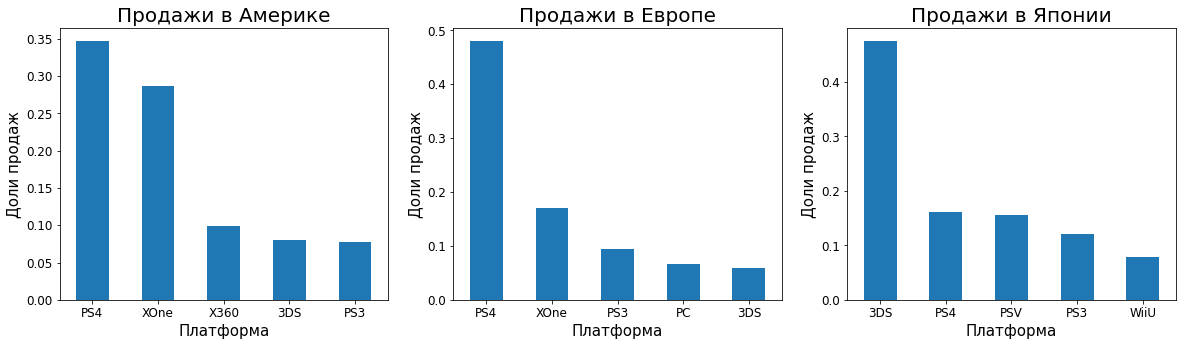

In [46]:
fig, axes = plt.subplots(1, 3, figsize=(20,5))
top_platforms('na_sales', 0)
top_platforms('eu_sales', 1)
top_platforms('jp_sales', 2)
plt.show()

**Вывод:** за период 2005-2016:
- в Америке топ-5 платформ: PS4, XOne, X360, 3DS, PS3. 
- в Европе топ-5 платформ: PS4, XOne, PS3, PC, 3DS.
- в Японии топ-5 платформ: 3DS, PS4, PSV, PS3, WiiU. 
В Америке и Европе пользуются популярностью игровые приставки PS4 и XOne. Также в Америке уже успела набрать популярность новая приставка - X360, до Европы она еще не дошла. В Европе также предпочитаюи играть на PC. 
В Японии топ возглавила портативная консоль 3DS. Игровые приставки сильно уступают ей. Также видим, что на японском рынке преимущество у японских производителей - Sony и Nintendo.

**4.2** Определим для каждого региона топ-5 популярных жанров.

Создадим функцию для вывода сводной таблицы продаж в разных регионов по жанрам:

In [47]:
def pivot_table_genre(index):
    table = games_actual.pivot_table(index=index,
                                     values=['na_sales', 'eu_sales', 'jp_sales'], 
                                    aggfunc=sum)
    return table

Создадим функцию для постройки столбчатых диаграмм:

In [48]:
def top_genre(index, region, ax):
    """
    Функция для создания стобчатых диаграмм для каждого региона, 
    которая также получает в качестве параметра значение, по которому идет группировка
    """
    title_dict = {'na_sales': 'Продажи в Америке', 'eu_sales': 'Продажи в Европе', 'jp_sales': 'Продажи в Японии'}
    diagramma = (
        games_actual
        .pivot_table(index=index, values=region, aggfunc=sum) #создаю сводные таблицы для региона по жанрам
        .sort_values(by=region, ascending=False)[:5] # сортировка по продажам
        .plot(kind='bar', # создание диаграммы
              y=region,
              title=title_dict[region], 
              ax=axes[ax],
              rot=0,
              fontsize=12,
              legend=False)        
    )
    diagramma.set_xlabel('Жанр игры', fontsize=15)
    diagramma.set_ylabel('Продажи', fontsize=15)
    diagramma.title.set_size(20)
    return diagramma

Выводим сводную таблицу продаж по жанрам:

In [49]:
pivot_table_genre('genre')

,eu_sales,jp_sales,na_sales
genre,,,
Action,74.68,29.58,72.53
Adventure,6.49,3.60,5.64
Fighting,6.69,6.37,12.43
Misc,12.86,5.61,15.05
Platform,6.80,2.69,6.79
Puzzle,0.52,0.93,0.65
Racing,14.13,1.76,8.74
Role-Playing,28.17,31.16,33.47
Shooter,65.52,4.87,79.02


Выводим диаграммы:

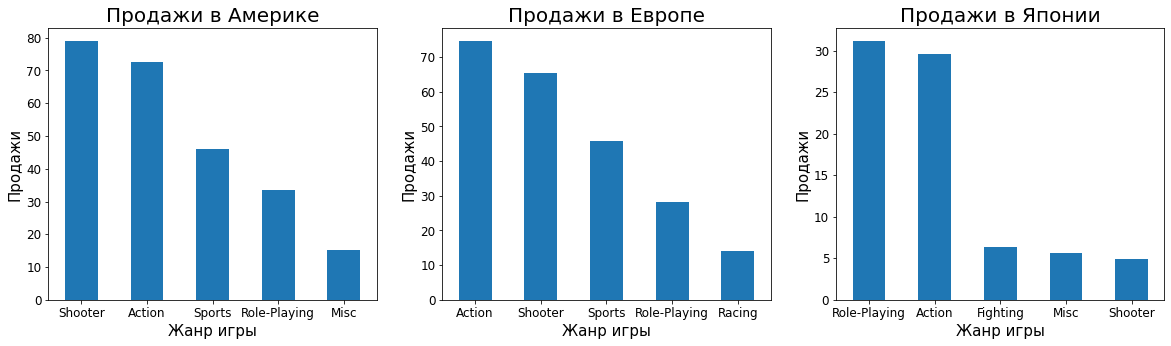

In [50]:
fig, axes = plt.subplots(1, 3, figsize=(20,5))
top_genre('genre', 'na_sales', 0)
top_genre('genre', 'eu_sales', 1)
top_genre('genre', 'jp_sales', 2)
plt.show()

**Вывод:** 
- американские и европейские пользователи также похожи в выборе жанра игры, в обоих случаях топ-4 возглавляют Action, Sports, Shooter и Role_playing, различие только в 5 ступени: для Америки и Европы это Misc и Racing соответсвенно.
- в Японии явный лидеры - Role-Playing и Action, дальше идут Fighting (лидер здесь 'Super Smash Bros. for Wii U and 3DS', в которую играют на самой популярной в Японии приставке 3DS), Misc и Shooter

In [51]:
# games_actual.query('genre == "Fighting"').sort_values(by="jp_sales", ascending=False)

**4.3** Определим влияет ли рейтинг ESRB на продажи в отдельном регионе

Entertainment Software Rating Board (ESRB) — негосударственная организация, основное направление деятельности — принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США, Канаде и Мексике.

Для начала приведем расшифровку рейтингов ESRB:
- **AO («Adults Only 18+»)** — «Только для взрослых»: Содержание игры только для взрослых старше 18 лет
- **E («Everyone»)** — «Для всех»: Содержание вполне подходит для всех возрастов (ранее с 6 лет). Такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера
- **E10+ («Everyone 10 and older»)** — «Для всех от 10 лет и старше»: Проекты с данным рейтингом могут содержать больше мультипликационного или мягкого насилия, или несколько откровенные сцены, или минимальное количество крови.
- **EC («Early childhood»)** — «Для детей младшего возраста»: Игра подходит для детей от 3 лет и не содержит материалов, которые родители могли бы счесть неподходящими. Продукты, получившие данный рейтинг, изначально разрабатываются для детей и обычно представляют собой развивающие игры
- **M («Mature»)** — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет. Проекты с данным рейтингом могут содержать жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику
- **RP («Rating Pending»)** — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга. Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официальной даты выпуска в продажу
- **T («Teen»)** — «Подросткам»: Игра подходит для лиц от 13 лет. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики

In [52]:
games_actual['rating'].unique()

array(['non-rated', 'M', 'E', 'T', 'E10+'], dtype=object)

Создадим сводную таблицу с продажами по рейтингам игр.

In [53]:
pivot_table_genre('rating')

,eu_sales,jp_sales,na_sales
rating,,,
E,58.06,8.94,50.74
E10+,26.16,4.46,33.23
M,93.44,8.01,96.42
T,34.07,14.78,38.95
non-rated,58.95,56.90,64.72


Выведем диаграммы:

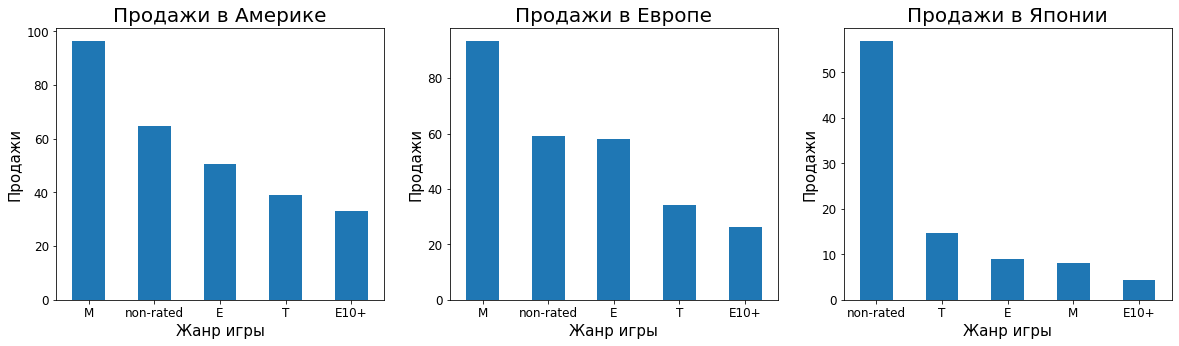

In [54]:
fig, axes = plt.subplots(1, 3, figsize=(20,5))
top_genre('rating', 'na_sales', 0)
top_genre('rating', 'eu_sales', 1)
top_genre('rating', 'jp_sales', 2)
plt.show()

**Вывод:** большое количество игр не имеют оценки от ESRB. Скорее всего это связано с тем, что не все разработчики отправляют свои игры на оценку этой организации. Так большинство игр заказываются и разрабатываются японцами под платформы своих производителей, а ESRB не оценивает игры в Японии. Отсюда мы видим, что в Японии большинство популярных игр не имеют оценки от ESRB. 
В Америке и Европе популярность игр с определенным рейтингом очень похожи. Первое место занимают игры с рейтингом "Для взрослых", неудивительно, так как в этих регионах самыми популярными жанрами являются экшены и шутеры. На втором месте расположились игры без оценки, возможно, этим играм еще не успели присвоить оценки или игры имеют более высокое ограничение по возрасту.

**Общий вывод:** 
- в Америке пользователь выбирает приставку PS4, а также приставки от своего производителя (XOne и X360), по жанрам предпочитает шутеры, экшн и спортивные игры. По возврастному рейтингу лидируют игры с рейтингом "Для взрослых".
- в Европе пользователь предпочитает играть на SonyPlaystation 4, по жанрам также предпочитает экшн, шутеры и спортивные игры. По возрастному рейтингу в топ игр вошел рейтинг «Только для взрослых»
- в Японии пользователь выбирает портативную приставку от японского производителя 3DS, а по жанрам выбирает ролевые игры и экшн. 

### Проверьте гипотезы

Проверим такие гипотезы:
- средние пользовательские рейтинги платформ *Xbox One* и *PC* одинаковые
- средние пользовательские рейтинги жанров *Action* (англ. «действие», экшен-игры) и *Sports* (англ. «спортивные соревнования») разные

**5.1.** Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Нулевая гипотеза H0 - средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Альтернативная гипотеза H1 - средние пользовательские рейтинги платформ Xbox One и PC различны.

In [55]:
# создаю датафреймы для обеих платформ
xone = games_actual.query('platform == "XOne"')
pc = games_actual.query('platform == "PC"')

Для проверки гипотезы будем использовать t-критерий Стьюдента, так как наши выборки не связаны между собой.
Установим уровень значимости равным 0.05. Для проверки гипотези о равенстве средних двух генеральных совокупностей будем использовать метод scipy.stats.ttest_ind.

In [56]:
result_1 = st.ttest_ind(xone['user_score'], pc['user_score'], nan_policy='omit')
# уровень значимости
alpha = 0.05 
# p-value

if result_1.pvalue < alpha:
    print(f'p-значение: {result_1.pvalue}. Отвергаем нулевую гипотезу')
else:
    print(f'p-значение: {result_1.pvalue}. Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.10450507919348513. Не получилось отвергнуть нулевую гипотезу


Средние пользовательские рейтинги платформ Xbox One и PC одинаковы. Проверим:

In [57]:
print(f'Cредние пользовательские рейтинги платформы Xbox One: {xone["user_score"].median()}')
print(f'Cредние пользовательские рейтинги платформы PC: {pc["user_score"].median()}')

Cредние пользовательские рейтинги платформы Xbox One: 6.8
Cредние пользовательские рейтинги платформы PC: 6.8


**Вывод:** гипотеза о равенстве средних пользовательских рейтингов платформ Xbox One и PC подтвердилась. Дейтсвительно, для Xbox One и PC - 6.8.

**5.2.** Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

Нулевая гипотеза H0 - средние пользовательские рейтинги жанров Action и Sports одинаковые.

Альтернативная гипотеза H1 - средние ользовательские рейтинги жанров Action и Sports различны.

Как и в случае с первой гипотезой, для проверки будем использовать t-критерий Стьюдента, так как наши выборки не связаны между собой.
Установим уровень значимости равным 0.05. Для проверки гипотези о равенстве средних двух генеральных совокупностей будем использовать метод scipy.stats.ttest_ind.

In [58]:
# создаю датафреймы для обоих жанров
action = games_actual.query('genre == "Action"')
sports = games_actual.query('genre == "Sports"')

In [59]:
result_2 = st.ttest_ind(action['user_score'], sports['user_score'], nan_policy='omit')
# уровень значимости
alpha = 0.05 
# p-value

if result_2.pvalue < alpha:
    print(f'p-значение: {result_2.pvalue}. Отвергаем нулевую гипотезу')
else:
    print(f'p-значение: {result_2.pvalue}. Не получилось отвергнуть нулевую гипотезу')

p-значение: 2.8711147985107304e-19. Отвергаем нулевую гипотезу


In [60]:
print(f'Cредние пользовательские рейтинги жанра Action: {action["user_score"].median()}')
print(f'Cредние пользовательские рейтинги жанра Sports: {sports["user_score"].median()}')

Cредние пользовательские рейтинги жанра Action: 7.1
Cредние пользовательские рейтинги жанра Sports: 5.5


**Вывод:** гипотеза о равенстве средних пользовательских рейтингов жанров Action и Sports не подтвердилась. Рейтинги различаются на 1.6 баллов. Для Action рейтинг составил 7.1, для Sports - 5.5.

### Общий вывод

В данном пректе нам необходимо было выявить определяющие успешность игры закономерности, что позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
В ходе исследования мы выяснили, что:
1. Рынок компьютерных игр начал развиваться в 1994 году. С 2002 по 2011 год было выпущено больше всего игр. Самыми популярными приставками оказались PS2 и X360. В среднем платформы живут 10 лет, после чего заменяются более продвинутыми аналогами. Исключение - PC, которые выделяют в одну большую платформу независимо от улучшения процессора, видеокарт итд. 
2. В качестве актуального выбрали период с 2014 по 2016 год, а потенциально прибыльные платформы -  PS4, XOne, 3DS, PC.
3. Больше всего игр-бестселлеров - для PS4 и 3DS. Неудивительно, так как на 3DS выходят такие эксклюзивные и ностальгические игры, как Марио и Покемон, а PS является более дешевой платформой, которую могут позволить себе многие (в отличие от того же PC, у котрого цена значительно растет с улучшением железа), и на которую выпускается большее количетсво игр, чем на XBox-ы.
4. Отзывы критиков сильнее влияют на продажи, чем отзывы от пользователей. Самая сильное влияние оказывают отзывы критиков на игры для X360 (коэффициент 0.525).
5. Больше всего выпущено игр в жанре Action, Role-Playing и Adventure. При этом экшены также являются и самыми продаваемыми играми. Дальше по продажам следуют шутеры и игры, связанные со спортом. А вот многочисленные приключения не отличаются высокими продажами, они вторые с конца по проданным копиям. Самые непродаваемые игры - в жанре Puzzle. Но если исключить влияние выбросов и оценить соотношение выпущенных игр к проданным копиям, то мы выяснили, что экшн также является топ-1 жанром. Но теперь на 2 месте с небольшим отставанием расположились приключения. А ролевые игры с сильным отставанием занимают 3 место. А вот шутеры сместились на последнее место. 
6. Составили портрет пользователя по регионам:
- в Америке пользователь выбирает приставку PS4, а также приставки от своего производителя (XOne и X360), по жанрам предпочитает шутеры, экшн и спортивные игры. По возврастному рейтингу лидируют игры с рейтингом "Для взрослых".
- в Европе пользователь предпочитает играть на SonyPlaystation 4, по жанрам также предпочитает экшн, шутеры и спортивные игры. По возрастному рейтингу в топ игр вошел рейтинг «Только для взрослых»
- в Японии пользователь выбирает портативную приставку от японского производителя 3DS, а по жанрам выбирает ролевые игры и экшн. 
7. Проверка гипотез привела к следующему:
- гипотеза о равенстве средних пользовательских рейтингов платформ Xbox One и PC подтвердилась. Для Xbox One и PC рейтинг - 6.8
-  гипотеза о равенстве средних пользовательских рейтингов жанров Action и Sports не подтвердилась. Рейтинги различаются на 1.6 баллов. Для Action рейтинг составил 7.1, для Sports - 5.5.

В целом рынок игр с 2012 года упал. Возможно, пользователям надоели постоянные ремастеры и продолжения игр, а новые игры с новыми идеями выходят не так часто. Также это может быть связано с кризисом, который не пережили многие компании, выпускающие игры. 

При проведении рекламной кампании в Америке и Европе можно сделать акцент на играх жанра экшн и шутер для приставок PlayStation 4 и XOne. В этих регионах это самые популярные жанры, а эти приставки набирают популярность. На таких играх, как "Call of Duty: Black Ops 3", "Grand Theft Auto V" можно сдлетаь пометку "бестселлер". Для японского рвнка можно сделать упор для игр на платформу 3DS в жанре ролевые игры и экшн, а в качестве бестселлера выбрать игру "Pokemon Omega Ruby/Pokemon Alpha Sapphire".